In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [416]:
SEED = 42

In [417]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['cancer'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [418]:
# Replace ' ' -> '_'
df.columns = df.columns.str.replace(' ', '_')
list(df.columns)

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension',
 'cancer']

In [419]:
remove_list = [
  'mean_radius',
  'mean_texture',
  'mean_perimeter',
  'mean_area',
  'mean_smoothness',
  'mean_compactness',
  'mean_concavity',
  'mean_concave_points',
  # 'mean_symmetry',
  'mean_fractal_dimension',
  'radius_error',
  'texture_error',
  'perimeter_error',
  'area_error',
  'smoothness_error',
  'compactness_error',
  'concavity_error',
  'concave_points_error',
  'symmetry_error',
  'fractal_dimension_error',
  'worst_radius',
  'worst_texture',
  'worst_perimeter',
  'worst_area',
  'worst_smoothness',
  'worst_compactness',
  'worst_concavity',
  'worst_concave_points',
  'worst_symmetry',
  'worst_fractal_dimension',
#  'cancer'
 ]

for remove_col in remove_list:
    df.drop(remove_col, axis=1, inplace=True)

In [420]:
df['cancer'].value_counts()

,count
cancer,
1,357
0,212


<Axes: xlabel='cancer', ylabel='count'>

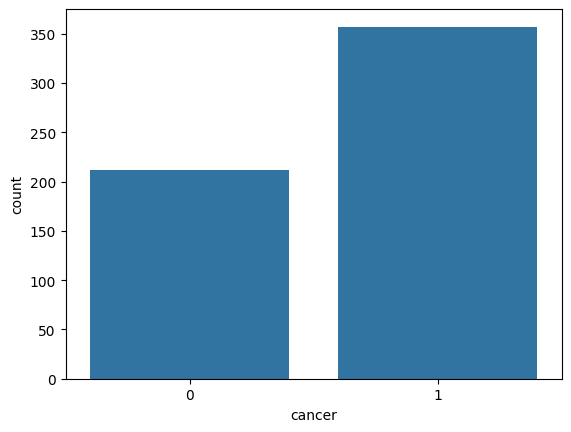

In [421]:
sns.countplot(data=df, x='cancer')

In [422]:
# Sum of rows which even 1 col's value is None
df.isnull().sum(axis=1).sum()

0

In [423]:
df.duplicated().sum()

83

<Axes: >

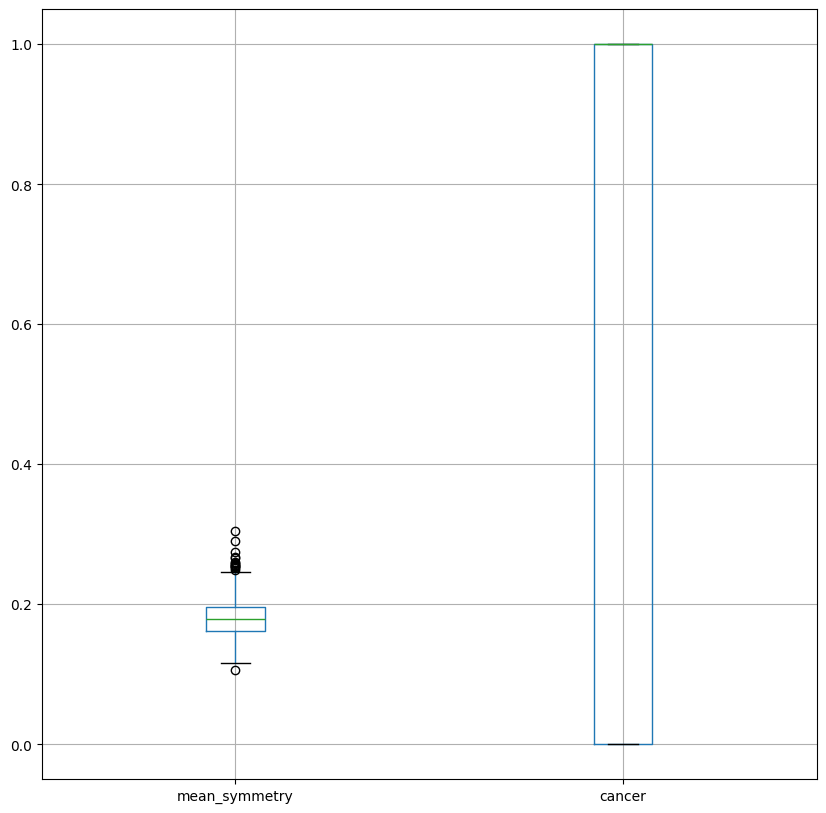

In [424]:
# Draw boxplot
df.boxplot(figsize=(10,10))

In [425]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
mean_symmetry,569.0,0.181162,0.027414,0.106,0.1619,0.1792,0.1957,0.304
cancer,569.0,0.627417,0.483918,0.000,0.0000,1.0000,1.0000,1.000


In [426]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1, random_state=SEED, stratify=df['cancer'])
train.shape, test.shape

((512, 2), (57, 2))

In [427]:
train['cancer'].value_counts()

,count
cancer,
1,321
0,191


In [428]:
train.head()

,mean_symmetry,cancer
413,0.1944,1
517,0.1802,0
245,0.1737,1
102,0.1739,1
28,0.1926,0


In [429]:
X_train = train.drop('cancer', axis=1)
y_train = train['cancer']

X_train.shape, y_train.shape

((512, 1), (512,))

In [430]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_train_s.shape # it's automatically changed to np.array

(512, 1)

In [431]:
print(ss.mean_) # Each columns's mean value
print(ss.var_) # Each columns's variance

[0.18069883]
[0.00076814]


In [432]:
y_train_e = y_train.to_numpy()
y_train_e.shape

(512,)

In [433]:
print(X_train_s.shape, y_train_e.shape)
print(type(X_train_s), type(y_train_e))

(512, 1) (512,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [434]:
from sklearn.svm import SVC

clf = SVC(random_state=SEED)
clf.fit(X_train_s, y_train_e)

SVC(random_state=42)

In [435]:
X_test = test.drop('cancer', axis=1)
y_test = test['cancer']

X_test.shape, y_test.shape

((57, 1), (57,))

In [436]:
X_test_s = ss.transform(X_test)
X_test_s[:5:]

array([[ 0.5160006 ],
       [ 2.8432252 ],
       [-0.52313224],
       [ 0.57373021],
       [ 0.94536452]])

In [437]:
y_test_e = y_test.to_numpy()
y_test_e

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [438]:
print(X_test_s.shape, y_test_e.shape)
print(type(X_test_s), type(y_test_e))

(57, 1) (57,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [439]:
y_pred = clf.predict(X_test_s)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [440]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

# Define a function to print classification metrics and display a confusion matrix heatmap
def print_metrics(y_true, y_pred, ave='binary'):
    print('accuracy:', accuracy_score(y_test_e, y_pred))
    print('recall:', recall_score(y_test_e, y_pred, average=ave))
    print('precision:', precision_score(y_test_e, y_pred, average=ave))
    print('f1 :', f1_score(y_test_e, y_pred, average=ave))

    # Generate and display the confusion matrix as a heatmap
    clm = confusion_matrix(y_test_e, y_pred)
    s = sns.heatmap(clm, annot=True, fmt='d', cbar=False)
    s.set(xlabel='Predicted', ylabel='Actual')  # Set axis labels
    plt.show()

accuracy: 0.6491228070175439
recall: 0.9166666666666666
precision: 0.66
f1 : 0.7674418604651163


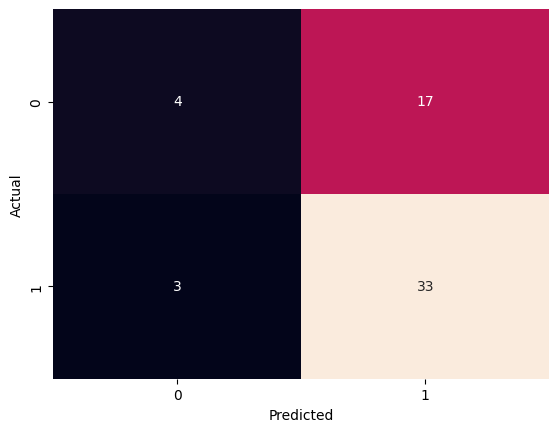

In [441]:
print_metrics(y_test_e, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
prams_grid = {
    'C': [0.001, 0.01, 0.02, 0.05, 0.1, 0.5, 1, 10, 100, 1000],  # Regularization parameter
    'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']  # Types of kernel functions
}

# Initialize the SVC model with a fixed random seed for reproducibility
clf = SVC(random_state=SEED)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=clf,               # Model to be optimized
    param_grid=prams_grid,       # Parameter grid to search
    cv=3,                        # 3-fold cross-validation
    n_jobs=-1,                   # Use all available CPU cores for parallel processing
    refit=True,                  # Refit the model with the best parameters on the entire training data
    verbose=2,                   # Increase verbosity for progress updates
    return_train_score=True      # Include training scores in the results
)

# Perform grid search and fit the model on the training data
grid_search.fit(X_train_s, y_train_e)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


In [ ]:
# Use the best estimator (model with optimal hyperparameters) to make predictions on the test data
y_pred = grid_search.best_estimator_.predict(X_test_s)
y_pred

In [ ]:
# Evaluate the model's performance using the custom print_metrics function
# This will display accuracy, recall, precision, F1 score, and the confusion matrix heatmap
print_metrics(y_test_e, y_pred)